In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('csv/estaticos_market/estaticos_market.csv')
df_p1 = pd.read_csv('csv/estaticos_portfolio1.csv')
df_p2 = pd.read_csv('csv/estaticos_portfolio2.csv')
df_p3 = pd.read_csv('csv/estaticos_portfolio3.csv')

In [3]:
# verificando missing values no dataset de base

def nanplot(df,title):
    nan_df = (df.isna().sum()/df.shape[0]).sort_values(ascending=True)
    plt.figure(figsize=(20,100))
    plt.barh(y=nan_df.index,width=nan_df.values*100)
    plt.title(title,fontsize=25)
    for index,value in enumerate(nan_df):
        plt.text((value*100)+.25,index-0.25,'{}%'.format(round(value*100,2)))
    plt.ylabel('Features',fontsize=20)
    plt.xlabel('Faltantes(%)',fontsize=20)

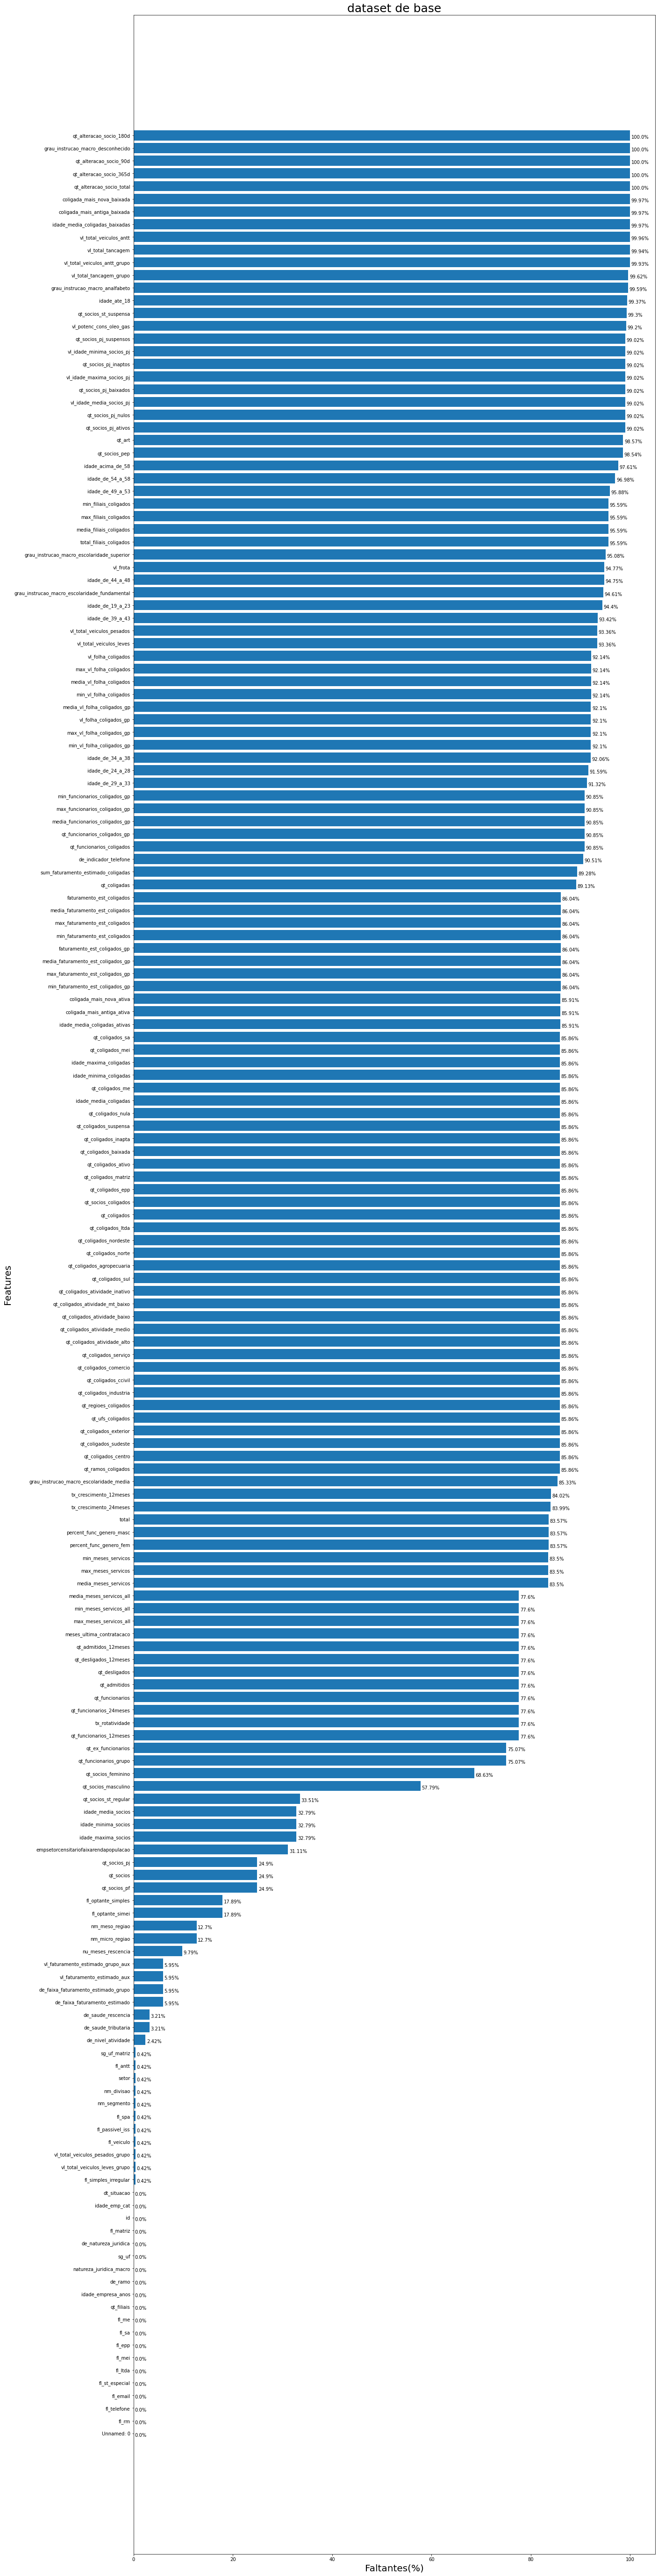

In [4]:
nanplot(df,'dataset de base')

In [5]:
to_drop = []
for i in df.columns:
    if (df[i].isna().sum()/df.shape[0]) > 0.5: to_drop.append(i)
to_drop

['vl_total_tancagem',
 'vl_total_veiculos_antt',
 'vl_total_veiculos_leves',
 'vl_total_veiculos_pesados',
 'qt_art',
 'vl_total_tancagem_grupo',
 'vl_total_veiculos_antt_grupo',
 'vl_potenc_cons_oleo_gas',
 'de_indicador_telefone',
 'vl_frota',
 'qt_socios_st_suspensa',
 'qt_socios_masculino',
 'qt_socios_feminino',
 'qt_socios_pep',
 'qt_alteracao_socio_total',
 'qt_alteracao_socio_90d',
 'qt_alteracao_socio_180d',
 'qt_alteracao_socio_365d',
 'qt_socios_pj_ativos',
 'qt_socios_pj_nulos',
 'qt_socios_pj_baixados',
 'qt_socios_pj_suspensos',
 'qt_socios_pj_inaptos',
 'vl_idade_media_socios_pj',
 'vl_idade_maxima_socios_pj',
 'vl_idade_minima_socios_pj',
 'qt_coligados',
 'qt_socios_coligados',
 'qt_coligados_matriz',
 'qt_coligados_ativo',
 'qt_coligados_baixada',
 'qt_coligados_inapta',
 'qt_coligados_suspensa',
 'qt_coligados_nula',
 'idade_media_coligadas',
 'idade_maxima_coligadas',
 'idade_minima_coligadas',
 'coligada_mais_nova_ativa',
 'coligada_mais_antiga_ativa',
 'idade_medi

In [6]:
df.drop(columns=to_drop, inplace=True)
df.shape

(462298, 51)

In [7]:
def feature_desc(feature):
    normaldata = pd.concat([mkt2[feature].value_counts(normalize = True),
                              p11[feature].value_counts(normalize = True),
                              p22[feature].value_counts(normalize = True),
                              p33[feature].value_counts(normalize = True)],axis=1)# columns=['mkt','e1','e2','e3'])
    normaldata.columns = ['mkt','Empresa1','Empresa2','Empresa3']
    normaldata.fillna(0.0, inplace=True)
    
    print(f'Feature:{feature}')
    print(normaldata*100)
    print(50*'-')

def simplegraphview(feature): #Pode se usar gráficos, mas a grande quantidade de categorias torna a visualização dificil
    
    mercado = mkt2[feature]
    emp1 = df_mount(p11[feature],'Empresa1')
    emp2 = df_mount(p22[feature],'Empresa2')
    emp3 = df_mount(p33[feature],'Empresa3')
   
    s = pd.concat([emp1,emp2,emp3])
    
    fig = plt.figure(1,figsize=(20,25))
    plt.subplot(211)
    sns.countplot(y=mercado)
    plt.subplot(212)
    sns.countplot(y='value', hue = 'class', data=s)

In [8]:
to_drop2 = ['fl_epp','fl_ltda','fl_me','fl_spa', 'fl_st_especial','fl_simples_irregular']
df.drop(columns=to_drop2, inplace=True)

In [9]:
feats_bool = df.columns[df.dtypes=='bool'].to_list()
feats_str = df.columns[df.dtypes=='object'].to_list()
feats_float= df.columns[df.dtypes=='float'].to_list()

In [10]:
df[feats_bool].fillna(value=0,inplace=True)
df[feats_str].fillna(value='', inplace=True)
df[feats_float].fillna(value=0,inplace=True)

df.fillna({x:False for x in feats_bool},inplace=True)
df.fillna({x:'' for x in feats_str},inplace=True)
df.fillna({x:0 for x in feats_float},inplace=True)
df.isna().sum()

/home/dimitri/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Unnamed: 0                               0
id                                       0
fl_matriz                                0
de_natureza_juridica                     0
sg_uf                                    0
natureza_juridica_macro                  0
de_ramo                                  0
setor                                    0
idade_empresa_anos                       0
idade_emp_cat                            0
fl_sa                                    0
fl_mei                                   0
dt_situacao                              0
fl_email                                 0
fl_telefone                              0
fl_rm                                    0
nm_divisao                               0
nm_segmento                              0
fl_antt                                  0
fl_veiculo                               0
fl_optante_simples                       0
vl_total_veiculos_pesados_grupo          0
vl_total_veiculos_leves_grupo            0
fl_optante_

In [11]:
cardinals = pd.DataFrame({'feature':feats_str, 'opts': df[feats_str].nunique()})
cardinals.reset_index(drop=True).sort_values(by='opts',ascending=False)

,feature,opts
0,id,462298
7,dt_situacao,7335
9,nm_divisao,88
20,nm_micro_regiao,74
1,de_natureza_juridica,67
4,de_ramo,33
15,sg_uf_matriz,28
10,nm_segmento,22
19,nm_meso_regiao,20
22,de_faixa_faturamento_estimado,13


In [12]:
df[['fl_veiculo','fl_antt','fl_optante_simples','fl_optante_simei','fl_rm','fl_antt']]

,fl_veiculo,fl_antt,fl_optante_simples,fl_optante_simei,fl_rm,fl_antt
0,False,False,True,False,SIM,False
1,False,False,,,SIM,False
2,False,False,True,True,SIM,False
3,False,False,True,False,SIM,False
4,False,False,True,False,SIM,False
...,...,...,...,...,...,...
462293,False,False,True,True,NAO,False
462294,False,False,False,False,SIM,False
462295,False,False,False,False,SIM,False
462296,False,False,False,False,NAO,False


In [13]:
#As variaveis com 2 opçoes podem ser encaradas como logicas. resta modificar a feature fl_rm e 
#passar todas elas para o tipo booleano

df.loc[df['fl_rm']=='NAO', 'fl_rm'] = False
df.loc[df['fl_rm']=='SIM', 'fl_rm'] = True

In [14]:
str_to_boolean_features = ['fl_veiculo','fl_antt','fl_optante_simples','fl_optante_simei','fl_rm','fl_antt']
df[str_to_boolean_features] = df[str_to_boolean_features].astype('bool')
feats_str        

['id',
 'de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_emp_cat',
 'dt_situacao',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'fl_antt',
 'fl_veiculo',
 'fl_optante_simples',
 'fl_optante_simei',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'de_nivel_atividade',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'fl_passivel_iss',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo']

In [15]:
#Reconferindo
feats_bool = df.columns[df.dtypes=='bool'].to_list()
feats_str = df.columns[df.dtypes=='object'].to_list()
feats_float= df.columns[df.dtypes=='float'].to_list()

In [16]:
cardinals = pd.DataFrame({'feature':feats_str, 'opts': df[feats_str].nunique()})
cardinals.reset_index(drop=True).sort_values(by='opts',ascending=False)

,feature,opts
0,id,462298
7,dt_situacao,7335
8,nm_divisao,88
15,nm_micro_regiao,74
1,de_natureza_juridica,67
4,de_ramo,33
10,sg_uf_matriz,28
9,nm_segmento,22
14,nm_meso_regiao,20
17,de_faixa_faturamento_estimado,13


In [17]:
high_cardinals = cardinals.loc[cardinals['opts'] > 10, 'feature'].to_list()
low_cardinals = cardinals.loc[cardinals['opts'] < 10, 'feature'].to_list()

high_cardinals.remove('id')

In [18]:
high_cardinals

['de_natureza_juridica',
 'de_ramo',
 'dt_situacao',
 'nm_divisao',
 'nm_segmento',
 'sg_uf_matriz',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo']

In [19]:
#separando as colunas de baixa cardinalidade com get_dummies
df = pd.get_dummies(df,prefix = low_cardinals, columns=low_cardinals)
df.shape

(462298, 83)

In [20]:
#LabelEncoder para encodar as colunas de alta cardinalidade

label_encoder = LabelEncoder()
for feature in high_cardinals:
    print(feature)
    df[feature] = label_encoder.fit_transform(df[feature])


de_natureza_juridica
de_ramo
dt_situacao
nm_divisao
nm_segmento
sg_uf_matriz
nm_meso_regiao
nm_micro_regiao
de_faixa_faturamento_estimado
de_faixa_faturamento_estimado_grupo


In [21]:
df.dtypes

Unnamed: 0                         int64
id                                object
fl_matriz                           bool
de_natureza_juridica               int64
de_ramo                            int64
                                   ...  
de_nivel_atividade_MEDIA           uint8
de_nivel_atividade_MUITO BAIXA     uint8
fl_passivel_iss_False              uint8
fl_passivel_iss_True               uint8
fl_passivel_iss_                   uint8
Length: 83, dtype: object

In [22]:
df.shape

(462298, 83)

In [23]:
#aplicando as transformações padrão

df_ids = df['id']
df.drop(columns='id', axis=1,inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.values)
df = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

df

,Unnamed: 0,fl_matriz,de_natureza_juridica,de_ramo,idade_empresa_anos,fl_sa,fl_mei,dt_situacao,fl_email,fl_telefone,...,de_saude_rescencia_ATE 6 MESES,de_saude_rescencia_SEM INFORMACAO,de_nivel_atividade_,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,fl_passivel_iss_False,fl_passivel_iss_True,fl_passivel_iss_
0,-1.732047,0.259019,1.841563,-0.190962,0.468908,-0.136302,-0.696124,-1.275305,1.115080,0.614873,...,-0.005095,-0.265422,-0.157339,1.427074,-0.443832,-0.944435,-0.103032,-0.856510,0.863845,-0.064697
1,-1.732040,0.259019,-0.445031,0.831845,-0.882484,-0.136302,1.436525,1.196407,1.115080,0.614873,...,-0.005095,-0.265422,-0.157339,-0.700735,2.253103,-0.944435,-0.103032,-0.856510,0.863845,-0.064697
2,-1.732032,0.259019,-0.445031,1.956933,-0.296966,-0.136302,1.436525,-0.025590,-0.896797,0.614873,...,-0.005095,-0.265422,-0.157339,-0.700735,-0.443832,1.058834,-0.103032,-0.856510,0.863845,-0.064697
3,-1.732025,0.259019,-0.445031,1.240968,-0.357370,-0.136302,-0.696124,0.101551,1.115080,0.614873,...,-0.005095,-0.265422,-0.157339,-0.700735,-0.443832,1.058834,-0.103032,-0.856510,0.863845,-0.064697
4,-1.732017,0.259019,-0.445031,1.445530,-0.701843,-0.136302,-0.696124,0.817998,1.115080,0.614873,...,-0.005095,-0.265422,-0.157339,1.427074,-0.443832,-0.944435,-0.103032,-0.856510,0.863845,-0.064697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,1.732017,0.259019,-0.445031,-1.009207,-0.696144,-0.136302,1.436525,0.805946,1.115080,0.614873,...,-0.005095,-0.265422,-0.157339,1.427074,-0.443832,-0.944435,-0.103032,1.167529,-1.157616,-0.064697
462294,1.732025,0.259019,-0.445031,0.729565,-0.103503,-0.136302,-0.696124,-0.424487,-0.896797,-1.626352,...,-0.005095,-0.265422,-0.157339,-0.700735,-0.443832,-0.944435,9.705741,-0.856510,0.863845,-0.064697
462295,1.732032,0.259019,-1.349033,1.138687,1.122808,-0.136302,-0.696124,-1.159613,-0.896797,-1.626352,...,-0.005095,-0.265422,-0.157339,-0.700735,-0.443832,1.058834,-0.103032,-0.856510,0.863845,-0.064697
462296,1.732040,0.259019,1.841563,-0.804646,-0.836042,-0.136302,-0.696124,1.098792,1.115080,-1.626352,...,-0.005095,-0.265422,-0.157339,1.427074,-0.443832,-0.944435,-0.103032,1.167529,-1.157616,-0.064697


In [24]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
pca = PCA(0.99)
pca_ft = pca.fit_transform(df)
print(f'number of components: {pca.n_components_}')

number of components: 57


In [29]:
df.columns[:57]

Index(['fl_matriz', 'de_natureza_juridica', 'de_ramo', 'idade_empresa_anos',
       'fl_sa', 'fl_mei', 'dt_situacao', 'fl_email', 'fl_telefone', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'fl_antt', 'fl_veiculo',
       'fl_optante_simples', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'fl_optante_simei', 'sg_uf_matriz',
       'nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao',
       'nm_meso_regiao', 'nm_micro_regiao', 'qt_socios', 'qt_socios_pf',
       'qt_socios_pj', 'idade_media_socios', 'idade_maxima_socios',
       'idade_minima_socios', 'qt_socios_st_regular',
       'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo',
       'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'sg_uf_AC', 'sg_uf_AM', 'sg_uf_MA', 'sg_uf_PI',
       'sg_uf_RN', 'sg_uf_RO', 'natureza_juridica_macro_ADMINISTRACAO PUBLICA',
       'natureza_juridica_macro_CARGO POLITICO',
       'natureza_juridica_ma

In [30]:
with open('1.pre-processamento/pca.pickle','wb') as f:
    pickle.dump(pca_ft, f)

In [31]:
df_id = pd.concat([df_ids,df], axis=1)

portfolio1 = df_id.loc[df_id['id'].isin(df_p1['id']), df_id.columns]
portfolio2 = df_id.loc[df_id['id'].isin(df_p2['id']), df_id.columns]
portfolio3 = df_id.loc[df_id['id'].isin(df_p3['id']), df_id.columns]

In [32]:
df_id.to_csv('1.pre-processamento/df_preprocessed.csv', index=False)
portfolio1.to_csv('1.pre-processamento/portfolio1_preprocessed.csv', index=False)
portfolio2.to_csv('1.pre-processamento/portfolio2_preprocessed.csv', index=False)
portfolio3.to_csv('1.pre-processamento/portfolio3_preprocessed.csv', index=False)
